## Seattle Pet License Data 

A fun look at the pets that live in and around Seattle.  I downloaded the data Jan 30 2018 from https://data.seattle.gov There is a SODA API tolken you can register for if I wanted to make a dashboard or automate pulling the data down, its supposed to be refreshed quarterly. However, the last time the data was updated was over a year ago, January 24, 2017.  For now I just really curious what kinds of pets people have and what they name them.

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://data.seattle.gov/resource/87w5-fd6d.csv'
local = 'Seattle_Pet_Licenses.csv'

raw_pets = pd.read_csv(local)

#make the column names more user friendly
raw_pets.columns = (['license_issued_date', 'license_number', 
                     'animal_name', 'species','primary_breed', 
                     'secondary_breed','zip_code'])
#we cant do much with the alpha numeric license number and many null values so drop it
raw_pets.drop('license_number', inplace=True, axis=1)

#set date column
raw_pets.license_issued_date = pd.to_datetime(raw_pets.license_issued_date)

#raw_pets['ZIP Code'] = pd.to_numeric(raw_pets['ZIP Code']) 
#^need to examine null values
raw_pets.info()
print('\n Most Recent Data:')
raw_pets.sort_values('license_issued_date').tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66042 entries, 0 to 66041
Data columns (total 6 columns):
license_issued_date    66042 non-null datetime64[ns]
animal_name            64685 non-null object
species                66042 non-null object
primary_breed          66042 non-null object
secondary_breed        22538 non-null object
zip_code               65884 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 3.0+ MB

 Most Recent Data:


,license_issued_date,animal_name,species,primary_breed,secondary_breed,zip_code
63920,2016-12-31,Jasper,Dog,"Terrier, American Pit Bull","Retriever, Labrador",98136
64689,2016-12-31,Benjamin,Dog,Beagle,NaN,98117
64783,2016-12-31,Smudge,Cat,Siamese,NaN,98117
65073,2016-12-31,ROSE,Cat,Domestic Medium Hair,Mix,98117
63206,2016-12-31,Foxy,Cat,Domestic Shorthair,NaN,98107


### Dogs, cats or ?  
Let's take a look at the species of all these pet licenses.

Species:
Dog          43076
Cat          22915
Livestock       51
Name: species, dtype: int64

 Breeds of Livestock:
Miniature      44
Pot-Bellied     4
Standard        2
Pot Bellied     1
Name: primary_breed, dtype: int64


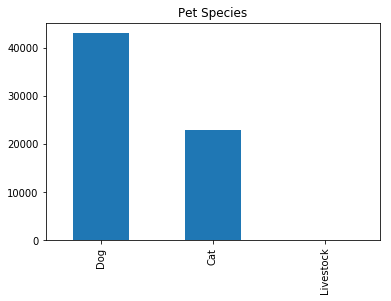

In [2]:
print('Species:')
print(raw_pets.species.value_counts())
raw_pets.species.value_counts().plot(kind='bar', title='Pet Species')
print('\n Breeds of Livestock:')
print(raw_pets[raw_pets.species=='Livestock'].primary_breed.value_counts())

### Top Ten Names For Each Pet Species  
Interestingly 'Lucy' is the most common name for Cats and Dogs. While 'Bella', 'Max' and 'Charlie' are also in the top 10 for both cats and dogs.

In [3]:
print('Top 10 Dog Names:')
print(raw_pets[raw_pets.species == 'Dog']['animal_name'].value_counts().head(10))
print('\n Top 10 Cat Names:')
print(raw_pets[raw_pets.species == 'Cat']['animal_name'].value_counts().head(10))
print('\n Top 10 Livestock Names:')
print(raw_pets[raw_pets.species == 'Livestock']['animal_name'].value_counts().head(10))

Top 10 Dog Names:
Lucy       416
Charlie    348
Bella      338
Buddy      256
Daisy      256
Max        254
Molly      243
Luna       242
Lola       232
Maggie     226
Name: animal_name, dtype: int64

 Top 10 Cat Names:
Lucy       150
Max        120
Luna       119
Bella      113
Oliver     108
Charlie     99
Lily        93
Jack        87
Sophie      81
Shadow      69
Name: animal_name, dtype: int64

 Top 10 Livestock Names:
Heidi                     2
Fuzzy Peaches             2
Daisy                     2
Moppet                    2
Teddy                     1
Roxy                      1
Professor Nibblesworth    1
Rosie                     1
Squiggie                  1
Mugsy                     1
Name: animal_name, dtype: int64


### What kind of cats and dogs are popular?  
Looking at the 20 most popular of the 267 different dog breeds and  53 different cat breeds.

267 Different Dog Breeds


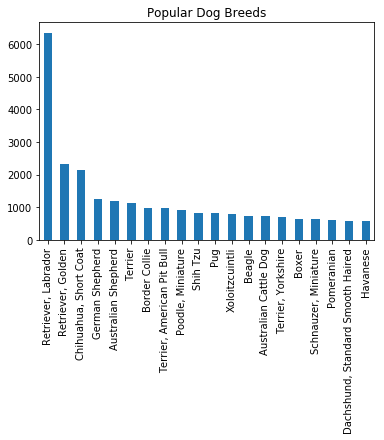

In [4]:
print(raw_pets[raw_pets.species == 'Dog']['primary_breed'].nunique(), 'Different Dog Breeds')
(raw_pets[raw_pets.species == 'Dog']['primary_breed']
 .value_counts().head(20)
 .plot(kind='bar', title='Popular Dog Breeds'))

53 Different Cat Breeds


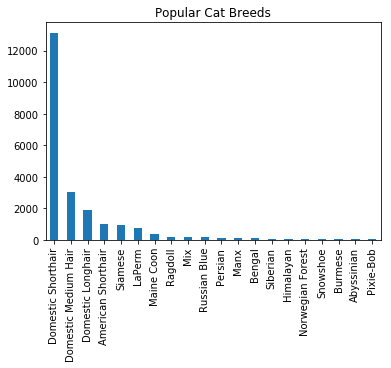

In [5]:
print(raw_pets[raw_pets.species == 'Cat']['primary_breed'].nunique(), 'Different Cat Breeds')
(raw_pets[raw_pets.species == 'Cat']['primary_breed'].value_counts().head(20).plot(kind='bar', title = 'Popular Cat Breeds'))


### What percentage are pure breeds?

In [6]:
pets_by_species = raw_pets.groupby('species').count()

pets_by_species['percent_pure'] = (pets_by_species['primary_breed']- pets_by_species['secondary_breed'])/pets_by_species['primary_breed']*100
print('Percent Pure Breeds:')
pets_by_species['percent_pure']

Percent Pure Breeds:


species
Cat           79.297403
Dog           58.691615
Livestock    100.000000
Name: percent_pure, dtype: float64

### Number of pet licences issued over time  
Now I will plot the number of monthly licences for each month, starting in 2013.

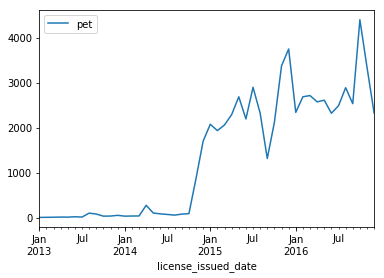

In [7]:
pets_time = raw_pets.loc[:,['license_issued_date']]
pets_time['pet'] = 1


pets_time = pets_time.set_index('license_issued_date')
pets_monthly = pets_time.resample('M').sum()
pets_monthly['2013-1':].plot()
#
#pets_monthly.reset_index(inplace=True)
#pets_monthly

### Conclusions:  

This was a quick fun look at the pet licenses issued in Seattle. Some interesting follow up analysis could be done on the location of these pets by zip code and also look at human demographics to see areaa with the highest pet to person ratios. Also wish they would refresh the data because we only have a small snap shot of time where there is a lot of data. Overall some fun analysis.